# Introduction

## Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading all files

In [4]:
acc=pd.read_csv("account_activity.csv")
customer=pd.read_csv("customer_data.csv")
fraud=pd.read_csv("fraud_indicators.csv")
suspision=pd.read_csv("suspicious_activity.csv")
merchant=pd.read_csv("merchant_data.csv")
trans_cat=pd.read_csv("transaction_category_labels.csv")
amount=pd.read_csv("amount_data.csv")
anomoly=pd.read_csv("anomaly_scores.csv")
trans_data=pd.read_csv("transaction_metadata.csv")
trans_reco=pd.read_csv("transaction_records.csv")

In [5]:
data=[acc,customer,fraud,suspision,merchant,trans_cat,amount,anomoly,trans_data,trans_reco]

In [8]:
for i in data:
    print(i.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

## Merging all dataframes into one

In [25]:
customer_data=pd.merge(customer,acc,on="CustomerID")
customer_data.head()

,CustomerID,Name,Age,Address,AccountBalance,LastLogin
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05


In [27]:
customer_data=pd.merge(customer_data,suspision,on="CustomerID")
customer_data.head()


,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0


In [29]:
customer_data.shape

(1000, 7)

In [28]:
transac_data1=pd.merge(fraud,trans_cat,on="TransactionID")
transac_data1.head()

,TransactionID,FraudIndicator,Category
0,1,0,Other
1,2,0,Online
2,3,0,Travel
3,4,0,Travel
4,5,0,Other


In [30]:
transac_data2=pd.merge(amount,anomoly,on="TransactionID")
transac_data2.head()

,TransactionID,TransactionAmount,AnomalyScore
0,1,79.413607,0.686699
1,2,12.053087,0.081749
2,3,33.310357,0.023857
3,4,46.121117,0.876994
4,5,54.051618,0.034059


In [31]:
transac_data3=pd.merge(trans_data,trans_reco,on="TransactionID")
transac_data3.head()

,TransactionID,Timestamp,MerchantID,Amount,CustomerID
0,1,2022-01-01 00:00:00,2701,55.530334,1952
1,2,2022-01-01 01:00:00,2070,12.881180,1027
2,3,2022-01-01 02:00:00,2238,50.176322,1955
3,4,2022-01-01 03:00:00,2879,41.634001,1796
4,5,2022-01-01 04:00:00,2966,78.122853,1946


In [32]:
transac_data=pd.merge(transac_data1,transac_data2,on="TransactionID")
transac_data=pd.merge(transac_data,transac_data3,on="TransactionID")

In [33]:
transac_data.head()

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946


In [34]:
df=pd.merge(customer_data,transac_data,on="CustomerID")
df.head()

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0,787,0,Food,87.375444,0.030921,2022-02-02 18:00:00,2627,33.670626
1,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0,641,0,Travel,46.044172,0.961552,2022-01-27 16:00:00,2496,30.980239
2,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0,450,0,Other,85.085061,0.525809,2022-01-19 17:00:00,2184,11.167088
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0,921,0,Other,36.534720,0.652188,2022-02-08 08:00:00,2111,45.849784
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0,599,0,Other,82.852025,0.661493,2022-01-25 22:00:00,2191,81.808651


In [35]:
df.shape

(1000, 15)

In [36]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag', 'TransactionID', 'FraudIndicator', 'Category',
       'TransactionAmount', 'AnomalyScore', 'Timestamp', 'MerchantID',
       'Amount'],
      dtype='object')

In [37]:
df.isnull().sum()

CustomerID           0
Name                 0
Age                  0
Address              0
AccountBalance       0
LastLogin            0
SuspiciousFlag       0
TransactionID        0
FraudIndicator       0
Category             0
TransactionAmount    0
AnomalyScore         0
Timestamp            0
MerchantID           0
Amount               0
dtype: int64

In [38]:
df.nunique()

CustomerID            636
Name                  636
Age                    47
Address               636
AccountBalance        636
LastLogin             636
SuspiciousFlag          2
TransactionID        1000
FraudIndicator          2
Category                5
TransactionAmount    1000
AnomalyScore         1000
Timestamp            1000
MerchantID            651
Amount               1000
dtype: int64

# Explore Data

In [39]:
useless_columns=['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [40]:
df1=df.drop(useless_columns,axis=1)
df1.head()

,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount
0,9507.272060,2022-01-01,0,0,Food,87.375444,0.030921,2022-02-02 18:00:00,33.670626
1,1715.321989,2022-01-03,0,0,Travel,46.044172,0.961552,2022-01-27 16:00:00,30.980239
2,3101.509134,2022-01-04,0,0,Other,85.085061,0.525809,2022-01-19 17:00:00,11.167088
3,3101.509134,2022-01-04,0,0,Other,36.534720,0.652188,2022-02-08 08:00:00,45.849784
4,5405.766914,2022-01-05,0,0,Other,82.852025,0.661493,2022-01-25 22:00:00,81.808651


In [53]:
df1['FraudIndicator'].value_counts()

FraudIndicator
0    955
1     45
Name: count, dtype: int64

In [54]:
df1['SuspiciousFlag'].value_counts()

SuspiciousFlag
0    975
1     25
Name: count, dtype: int64

In [55]:
df1['Category'].value_counts(),

(Category
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: count, dtype: int64,)

<Axes: xlabel='FraudIndicator', ylabel='count'>

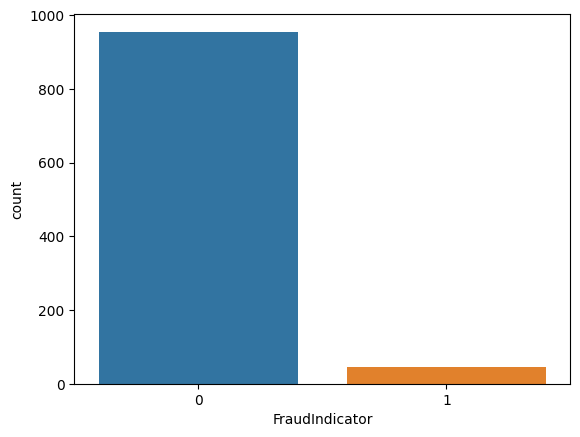

In [86]:
sns.countplot(data=df1,x='FraudIndicator')

<Axes: xlabel='FraudIndicator', ylabel='count'>

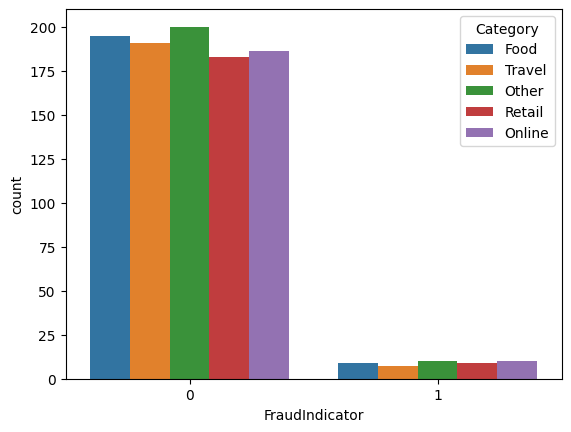

In [87]:
sns.countplot(data=df1,x='FraudIndicator',hue="Category")

<Axes: xlabel='SuspiciousFlag', ylabel='count'>

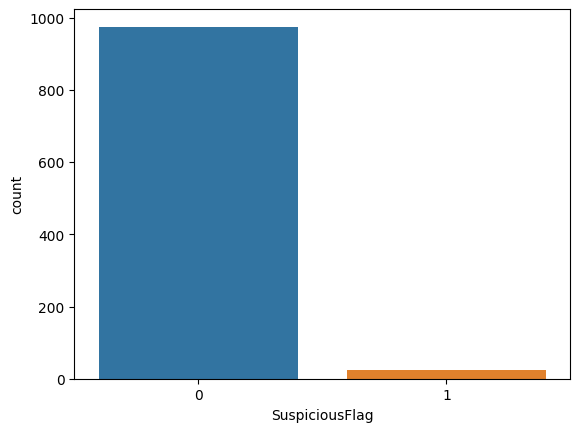

In [88]:
sns.countplot(data=df1,x='SuspiciousFlag')

<Axes: xlabel='SuspiciousFlag', ylabel='count'>

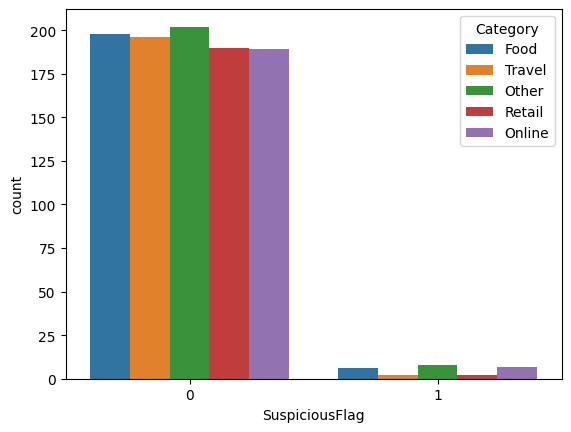

In [89]:
sns.countplot(data=df1,x='SuspiciousFlag',hue="Category")

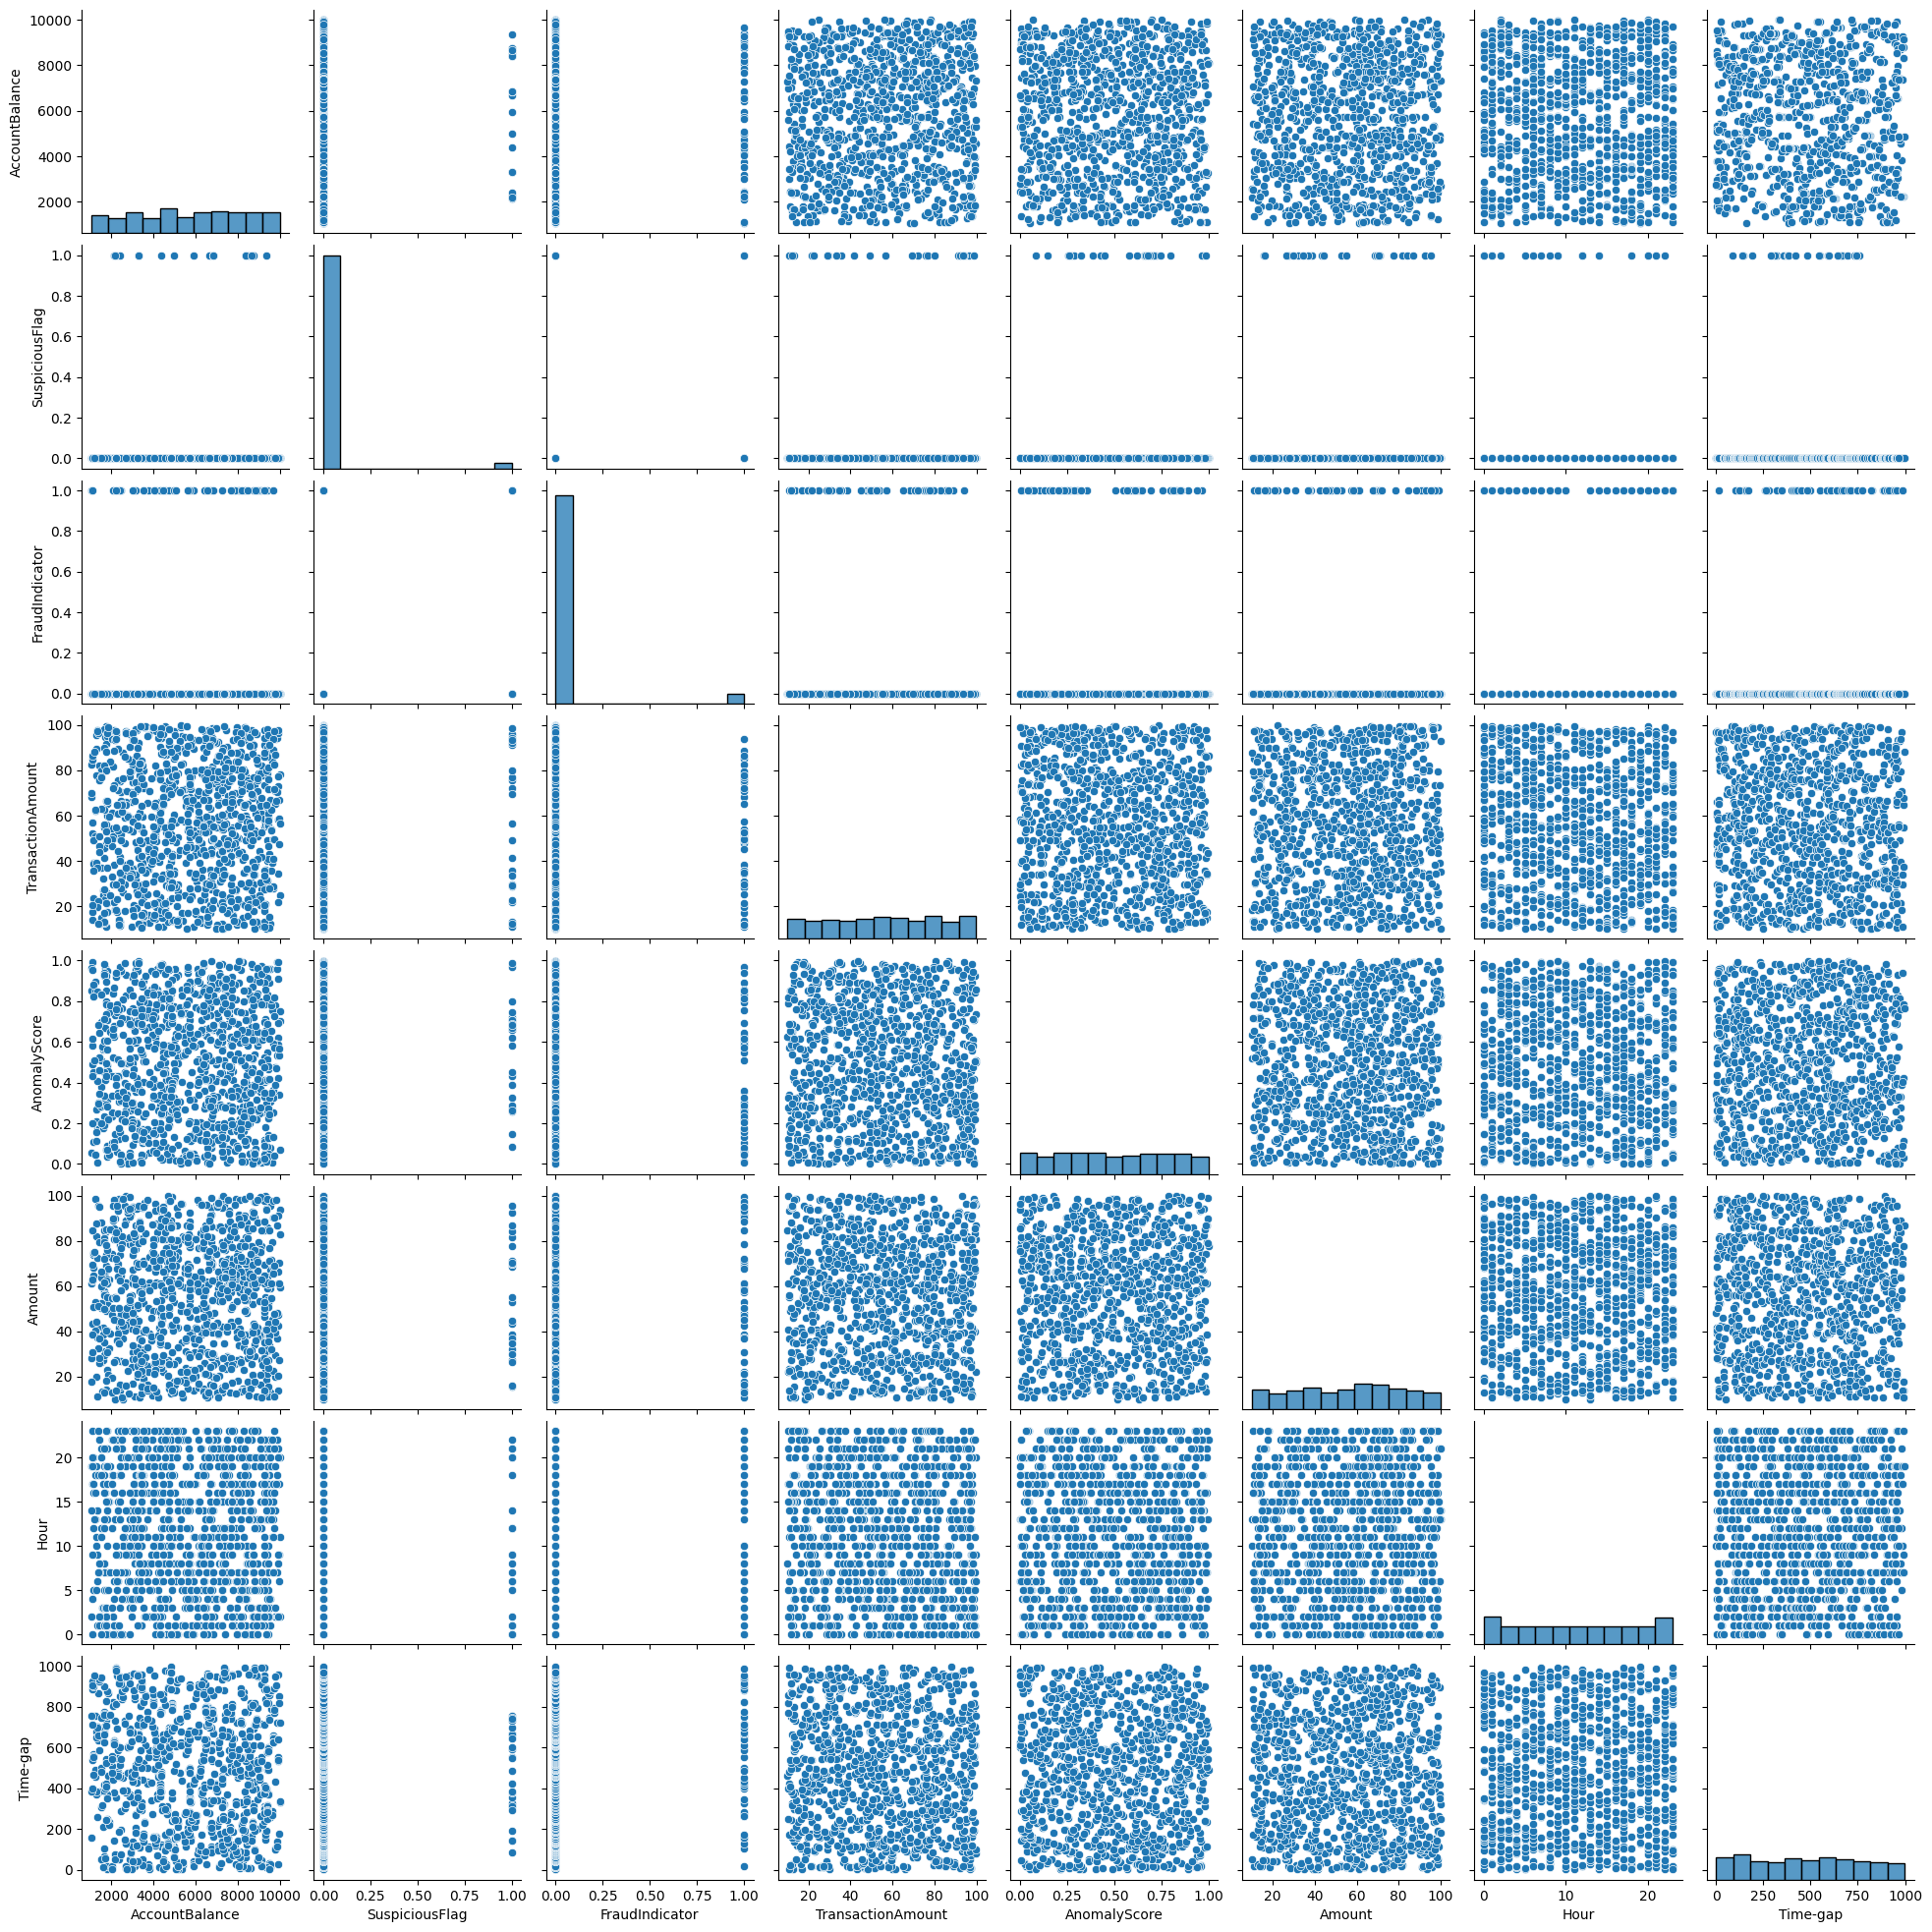

In [90]:
sns.pairplot(data=df1)

# Feature Engineering

Cheking the date columns is actually in datatime64 datatype

In [43]:
if pd.api.types.is_datetime64_any_dtype(df1["Timestamp"]):
    print("True")
else:
    print("False")

False


So the Timestamp column is not in the regural date type format

In [44]:
df1["Timestamp1"]=pd.to_datetime(df1['Timestamp'])

In [45]:
df1.head()

,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,Timestamp1
0,9507.272060,2022-01-01,0,0,Food,87.375444,0.030921,2022-02-02 18:00:00,33.670626,2022-02-02 18:00:00
1,1715.321989,2022-01-03,0,0,Travel,46.044172,0.961552,2022-01-27 16:00:00,30.980239,2022-01-27 16:00:00
2,3101.509134,2022-01-04,0,0,Other,85.085061,0.525809,2022-01-19 17:00:00,11.167088,2022-01-19 17:00:00
3,3101.509134,2022-01-04,0,0,Other,36.534720,0.652188,2022-02-08 08:00:00,45.849784,2022-02-08 08:00:00
4,5405.766914,2022-01-05,0,0,Other,82.852025,0.661493,2022-01-25 22:00:00,81.808651,2022-01-25 22:00:00


In [46]:
df1.dtypes

AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
Timestamp1           datetime64[ns]
dtype: object

Now it is in Date time data type

In [47]:
df1['Hour']=df1['Timestamp1'].dt.hour

In [48]:
df1["LastLogin"]=pd.to_datetime(df1['LastLogin'])

In [49]:
df1.dtypes

AccountBalance              float64
LastLogin            datetime64[ns]
SuspiciousFlag                int64
FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
Timestamp1           datetime64[ns]
Hour                          int32
dtype: object

In [50]:
df1["Time-gap"]=(df1["Timestamp1"]-df1["LastLogin"]).dt.days.abs()

In [56]:
df1.head()

,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,Timestamp1,Hour,Time-gap
0,9507.272060,2022-01-01,0,0,Food,87.375444,0.030921,2022-02-02 18:00:00,33.670626,2022-02-02 18:00:00,18,32
1,1715.321989,2022-01-03,0,0,Travel,46.044172,0.961552,2022-01-27 16:00:00,30.980239,2022-01-27 16:00:00,16,24
2,3101.509134,2022-01-04,0,0,Other,85.085061,0.525809,2022-01-19 17:00:00,11.167088,2022-01-19 17:00:00,17,15
3,3101.509134,2022-01-04,0,0,Other,36.534720,0.652188,2022-02-08 08:00:00,45.849784,2022-02-08 08:00:00,8,35
4,5405.766914,2022-01-05,0,0,Other,82.852025,0.661493,2022-01-25 22:00:00,81.808651,2022-01-25 22:00:00,22,20


# Modelling

## First Model for Fraud Detecting

### Splitting data 

In [57]:
X=df1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
y=df1['FraudIndicator']

In [58]:
X.head()

,AccountBalance,SuspiciousFlag,Category,TransactionAmount,AnomalyScore,Amount,Hour,Time-gap
0,9507.272060,0,Food,87.375444,0.030921,33.670626,18,32
1,1715.321989,0,Travel,46.044172,0.961552,30.980239,16,24
2,3101.509134,0,Other,85.085061,0.525809,11.167088,17,15
3,3101.509134,0,Other,36.534720,0.652188,45.849784,8,35
4,5405.766914,0,Other,82.852025,0.661493,81.808651,22,20


### Encode the Category Column

In [59]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
X["Category"]=encode.fit_transform(X["Category"])

In [60]:
X.head()

,AccountBalance,SuspiciousFlag,Category,TransactionAmount,AnomalyScore,Amount,Hour,Time-gap
0,9507.272060,0,0,87.375444,0.030921,33.670626,18,32
1,1715.321989,0,4,46.044172,0.961552,30.980239,16,24
2,3101.509134,0,2,85.085061,0.525809,11.167088,17,15
3,3101.509134,0,2,36.534720,0.652188,45.849784,8,35
4,5405.766914,0,2,82.852025,0.661493,81.808651,22,20


### Splitting into test train data

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Using Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


In [67]:
l_model=LogisticRegression()
l_model.fit(X_train,y_train)
pred1=l_model.predict(X_test)


### Accuracy Scores

In [68]:
accuracy_score(y_test,pred1)

0.945

In [69]:
mean_absolute_error(y_test,pred1)

0.055

In [70]:
l_model.score(X_test,y_test)

0.945

## Second Model for detecting Suspicion

In [74]:
df1.head()

,AccountBalance,LastLogin,SuspiciousFlag,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,Timestamp1,Hour,Time-gap
0,9507.272060,2022-01-01,0,0,Food,87.375444,0.030921,2022-02-02 18:00:00,33.670626,2022-02-02 18:00:00,18,32
1,1715.321989,2022-01-03,0,0,Travel,46.044172,0.961552,2022-01-27 16:00:00,30.980239,2022-01-27 16:00:00,16,24
2,3101.509134,2022-01-04,0,0,Other,85.085061,0.525809,2022-01-19 17:00:00,11.167088,2022-01-19 17:00:00,17,15
3,3101.509134,2022-01-04,0,0,Other,36.534720,0.652188,2022-02-08 08:00:00,45.849784,2022-02-08 08:00:00,8,35
4,5405.766914,2022-01-05,0,0,Other,82.852025,0.661493,2022-01-25 22:00:00,81.808651,2022-01-25 22:00:00,22,20


In [75]:
x_sus=df1.drop(["SuspiciousFlag","Timestamp","Timestamp1","LastLogin"],axis=1)
y_sus=df1["SuspiciousFlag"]

In [77]:
x_sus.head()

,AccountBalance,FraudIndicator,Category,TransactionAmount,AnomalyScore,Amount,Hour,Time-gap
0,9507.272060,0,Food,87.375444,0.030921,33.670626,18,32
1,1715.321989,0,Travel,46.044172,0.961552,30.980239,16,24
2,3101.509134,0,Other,85.085061,0.525809,11.167088,17,15
3,3101.509134,0,Other,36.534720,0.652188,45.849784,8,35
4,5405.766914,0,Other,82.852025,0.661493,81.808651,22,20


In [78]:
y_sus.head()

0    0
1    0
2    0
3    0
4    0
Name: SuspiciousFlag, dtype: int64

### Encoding Category Column

In [79]:
x_sus["Category"]=encode.fit_transform(x_sus["Category"])

In [80]:
x_sus.head()

,AccountBalance,FraudIndicator,Category,TransactionAmount,AnomalyScore,Amount,Hour,Time-gap
0,9507.272060,0,0,87.375444,0.030921,33.670626,18,32
1,1715.321989,0,4,46.044172,0.961552,30.980239,16,24
2,3101.509134,0,2,85.085061,0.525809,11.167088,17,15
3,3101.509134,0,2,36.534720,0.652188,45.849784,8,35
4,5405.766914,0,2,82.852025,0.661493,81.808651,22,20


### Splitting into test train data

In [81]:
x_train,x_test,Y_train,Y_test=train_test_split(x_sus,y_sus,test_size=0.2)

### Using Logistic Regression

In [82]:
l1_model=LogisticRegression()
l1_model.fit(x_train,Y_train)
pred2=l1_model.predict(x_test)

### Accuracy Scores

In [83]:
accuracy_score(Y_test,pred2)

0.975

In [84]:
mean_absolute_error(Y_test,pred2)

0.025

In [85]:
l1_model.score(x_test,Y_test)

0.975